# Project 01 — Data Manipulation & Visualization  
### Fashion-MNIST Dataset

This notebook performs a complete introductory workflow for data loading, exploration, visualization, preprocessing, and baseline modeling using the Fashion-MNIST dataset.  
The goal is to demonstrate clear foundational skills in data analysis and machine learning while maintaining a clean and professional structure.


## 1. Introduction

Fashion-MNIST is a dataset of 70,000 grayscale images (28x28 px) of clothing items across 10 classes.  
It is considered a modern and more visually appealing alternative to classic MNIST, while maintaining an identical structure.

In this notebook, we will:

- Load and inspect the dataset  
- Visualize sample images  
- Explore class distribution  
- Preprocess the data  
- Train a simple baseline model  
- Discuss results and next steps


In [1]:
%pip install -q tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


2025-11-25 18:44:14.963861: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-25 18:44:15.013834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 18:44:17.580925: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

## 2. Dataset Overview

Below we inspect the dataset structure, dimensions, and class distribution.


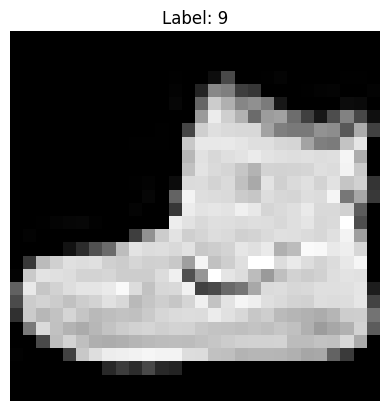

In [5]:
# Show first sample and label
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


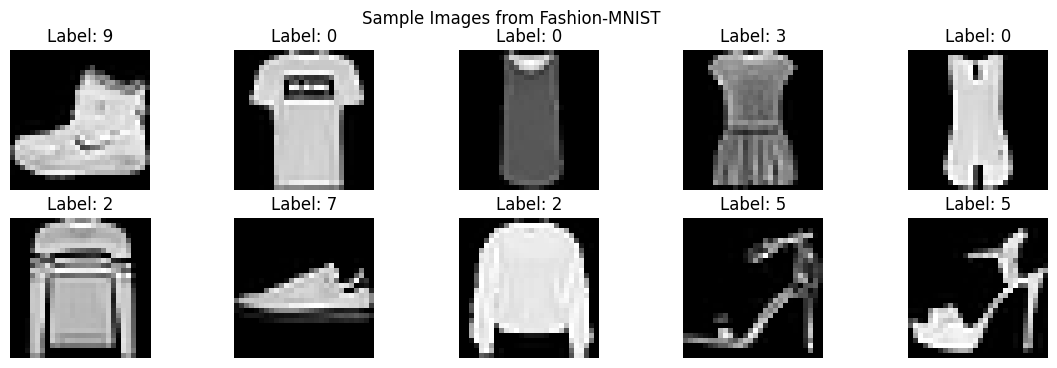

In [6]:
# Plot grid of 10 sample images
plt.figure(figsize=(14, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.suptitle("Sample Images from Fashion-MNIST")
plt.show()


## 3. Class Distribution


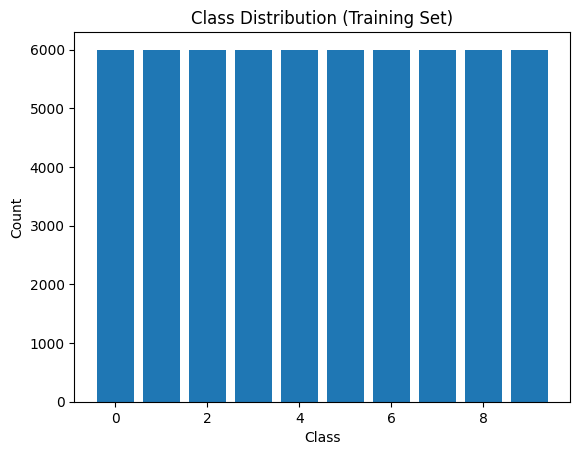

In [7]:
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts)
plt.title("Class Distribution (Training Set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## 4. Preprocessing
We flatten images and scale pixel values to prepare the data for a simple baseline classifier.


In [8]:
# Normalize pixel values
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Flatten images (28x28 → 784 features)
X_train_flat = X_train_norm.reshape(len(X_train_norm), -1)
X_test_flat = X_test_norm.reshape(len(X_test_norm), -1)

X_train_flat.shape


(60000, 784)

## 5. Baseline Model
We train a simple Logistic Regression classifier to establish a baseline performance.


In [9]:
# Training baseline model
model = LogisticRegression(max_iter=200)
model.fit(X_train_flat, y_train)

# Predictions
y_pred = model.predict(X_test_flat)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8443

In [10]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.76      0.75      1000
           5       0.95      0.92      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## 6. Results

The baseline model using Logistic Regression provides an initial performance benchmark.  
Its accuracy is not expected to be high, but it serves as a reference for future improvements using neural networks or convolution-based architectures.


## 7. Next Steps

Possible improvements include:

- Training a small neural network  
- Using convolutional layers (CNN)  
- Applying data augmentation  
- Visualizing misclassified samples  
- Comparing multiple baseline models  

This notebook serves as the first step in a structured 30-day AI learning journey.
